# Demo notebook

In [1]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder


In [2]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

## Random test

In [3]:
data, labels = dynamic_generate_positive_gaussian_data(
    dim=3,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
data = batch_norm(data)
data[:5]

array([[0.        , 1.        , 0.01959192],
       [1.        , 0.        , 0.4070175 ],
       [0.        , 0.38090406, 1.        ],
       [0.6965442 , 0.        , 1.        ],
       [0.        , 1.        , 0.99405304]])

In [8]:
choquet = Choquet(X=data[0], mu=generate_capacity(enumerate_permute_unit(data[0])), version='d_choquet', p=1, q=1)
print(choquet.choquet)
# choquet.Choquet_classic(verbose=True)

1.6440331


In [9]:
mu=generate_capacity(enumerate_permute_unit(data[0]))
sim = S1(X=data[0], Y=data[10], mu=mu)
print(sim.score())

0.9030872735009823


In [10]:
for i in range(10):
    sim = S1(X=data[0], Y=data[i], mu=mu)
    print(sim.score())

0.9278036287908223
0.0016314543610998764
0.13894959805729454
0.0026346202681365397
0.34473282698216257
0.9682687957805132
0.5010011012203993
0.5612713360476715
0.0027466412757665873
0.6026896527498947


In [12]:
knn = KNNFuzz(input_dimension=4, mu=mu, k=3, sim=S1, choquet_version='d_choquet', p=1, q=1)
knn.train(data, labels)

Leave one out avec k = 1
SimLevel1: 0.33
SimLevel2: 0.2833333333333333
SimLevel3: 0.33666666666666667

Result in 11.5091 seconds.
Leave one out avec k = 2
SimLevel1: 0.36333333333333334
SimLevel2: 0.29333333333333333
SimLevel3: 0.3233333333333333

Result in 11.3609 seconds.
Leave one out avec k = 3
SimLevel1: 0.3233333333333333
SimLevel2: 0.27666666666666667
SimLevel3: 0.32

Result in 11.1610 seconds.
Leave one out avec k = 4
SimLevel1: 0.35333333333333333
SimLevel2: 0.29333333333333333
SimLevel3: 0.32

Result in 11.3698 seconds.
Leave one out avec k = 5
SimLevel1: 0.3466666666666667
SimLevel2: 0.31
SimLevel3: 0.3433333333333333

Result in 11.3409 seconds.
Leave one out avec k = 6
SimLevel1: 0.3566666666666667
SimLevel2: 0.31
SimLevel3: 0.3

Result in 11.3686 seconds.
Leave one out avec k = 7
SimLevel1: 0.33666666666666667
SimLevel2: 0.2966666666666667
SimLevel3: 0.29333333333333333

Result in 11.2336 seconds.
Leave one out avec k = 8
SimLevel1: 0.3433333333333333
SimLevel2: 0.34
SimLe

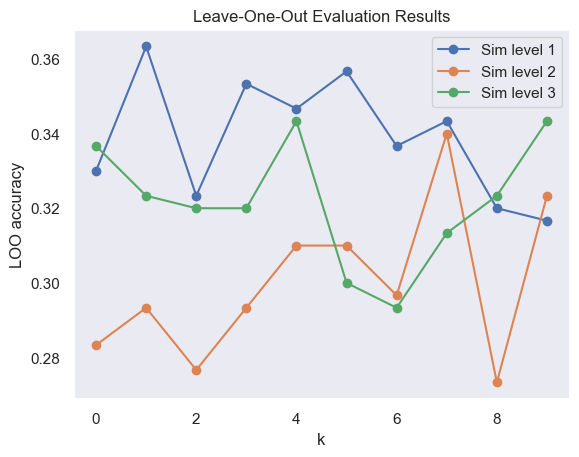

In [14]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1], mu=mu, k=3, sim=S1, choquet_version='d_choquet', p=1, q=1), 
            DS = (data, labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2, choquet_version='d_choquet', p=1, q=1), 
            DS = (data, labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S3, choquet_version='d_choquet', p=1, q=1), 
            DS = (data, labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test on iris

In [15]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [16]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


Leave one out avec k = 1
SimLevel1: 0.6666666666666666
SimLevel2: 0.38
SimLevel3: 0.9533333333333334

Result in 4.6734 seconds.
Leave one out avec k = 2
SimLevel1: 0.6666666666666666
SimLevel2: 0.46
SimLevel3: 0.9533333333333334

Result in 4.6618 seconds.
Leave one out avec k = 3
SimLevel1: 0.6666666666666666
SimLevel2: 0.6133333333333333
SimLevel3: 0.94

Result in 4.6474 seconds.
Leave one out avec k = 4
SimLevel1: 0.6666666666666666
SimLevel2: 0.41333333333333333
SimLevel3: 0.9333333333333333

Result in 4.6540 seconds.
Leave one out avec k = 5
SimLevel1: 0.6666666666666666
SimLevel2: 0.44
SimLevel3: 0.9466666666666667

Result in 4.5143 seconds.
Leave one out avec k = 6
SimLevel1: 0.6666666666666666
SimLevel2: 0.4066666666666667
SimLevel3: 0.9666666666666667

Result in 4.6761 seconds.
Leave one out avec k = 7
SimLevel1: 0.6666666666666666
SimLevel2: 0.4533333333333333
SimLevel3: 0.9466666666666667

Result in 4.6923 seconds.
Leave one out avec k = 8
SimLevel1: 0.6666666666666666
SimLev

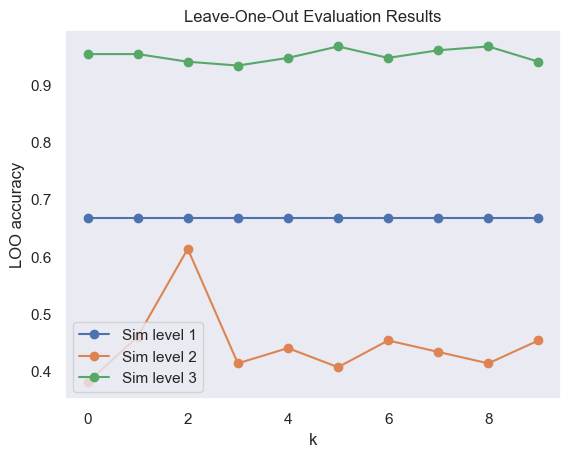

In [19]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1], mu=mu, k=3, sim=S1, choquet_version='d_choquet', p=1, q=1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1], mu=mu, k=3, sim=S2, choquet_version='d_choquet', p=1, q=1), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1], mu=mu, k=k, sim=S3, choquet_version='d_choquet', p=1, q=1), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test penguins

In [12]:
penguins = load_penguins()
penguins

# Encode
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

# Remove missing values
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [13]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


In [14]:
# # LOO evaluation
# # Define list for each sim level
# l1 = []
# l2 = []
# l3 = []
# k = 10

# for k in range(1, k+1): 
#     tic = time.time()
#     mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

#     print(f"Leave one out avec k = {k}")
    
#     # SimLevel1
#     res = leave_one_out(
#             C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
#             DS = (data_norm, data_labels)
#         )
#     l1.append(res)
#     print(f"SimLevel1: {res}")
#     # Sim level 2
#     res = leave_one_out(
#             C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
#             DS = (data_norm, data_labels)
#         )
#     l2.append(res)
#     print(f"SimLevel2: {res}")

#     # Sim level 3
#     res = leave_one_out(
#             C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
#             DS = (data_norm, data_labels)
#         )
#     l3.append(res)
#     print(f"SimLevel3: {res}")

#     toc = time.time()
#     print(f"Result in {(toc-tic):0.4f} seconds.\n")

# # Plot results
# plt.plot(l1, label="Sim level 1", marker='o')
# plt.plot(l2, label="Sim level 2", marker='o')
# plt.plot(l3, label="Sim level 3", marker='o')

# # Config additional params
# plt.ylabel("LOO accuracy")
# plt.xlabel("k")
# plt.title("Leave-One-Out Evaluation Results")
# plt.grid()
# plt.legend()

In [15]:
restricted_dissim(1, 0.2, p=1, q=2)  # Should return 1

np.float64(0.8944271909999159)

In [16]:
for i in range(20):
    print(d_Choquet_integral(X=data[i], mu=mu))

0.5122874
0.6082897
1.183232
0.33874217
1.433209
1.1653045
0.9673966
0.85961044
0.8349121
1.447497
0.526643
0.33692893
0.8491338
1.506527
0.8525515
0.9925179
1.372129
0.3458757
1.223994
0.39420214


In [17]:
d_Choquet_integral(X=data[0], mu=mu)

array(0.5122874, dtype=float32)